<a href="https://colab.research.google.com/github/BrendaGuadalupeVazquez/INVESTIGACI-N-DE-OPERACIONES/blob/main/TutorialNetworkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dibujo de redes**
Vázquez Romero Brenda Guadalupe

---



Ejercicio 29 de Septiembre 2025

La librería Networkx es una herramienta que nos permite:

*   Crear grafos (dirigidos, no dirigidos y multigrafos)

*   Manipular redes complejas (agregar nodos, aristas, atributos)

*   Analizar propiedades (grados, caminos, conectividad, etc.)

*   Visualizar grafoss de forma sencilla

---



Como primer paso instalaremos la librería (para Google colab ya no es necesario, ya está incluida)

Para eso, en una celda de código escribiremos lo siguiente:

In [14]:
#!pip install networkx

Ahora ya instalada, vamor a importar la librería de networkx y también importaremos matplotlib para los gráficos

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

Hay dos tipos principales de grafos:
- **Grafos no dirigidos**: Las aristas no tienen dirección.
- **Grafos dirigidos**: Las aristas tienen dirección (tipo flecha).

---


##Grafo no dirigido (simple)

A continuación, vamos a crear un grafo no dirigido simple con 4 nodos

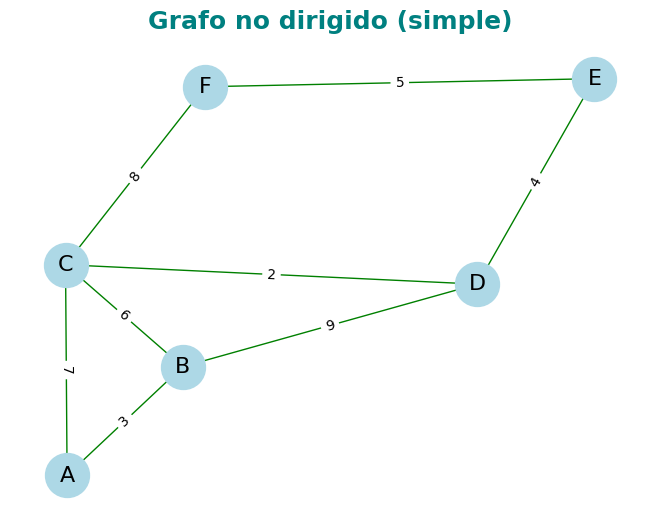

In [30]:
G=nx.Graph() #Grafo no dirigido
G.add_nodes_from(["A", "B", "C", "D","E","F"]) #Creamos los nodos
G.add_edge("A","B",weight=3) #Creamos las aristas
G.add_edge("B","C",weight=6)
G.add_edge("A","C",weight=7)
G.add_edge("B","D",weight=9)
G.add_edge("C","D",weight=2)
G.add_edge("D", "E",weight=4)
G.add_edge("E", "F",weight=5)
G.add_edge("C", "F",weight=8)
#Graficamos
pos=nx.spring_layout(G)
labels=nx.get_edge_attributes(G,'weight')
nx.draw(G,pos,with_labels=True,node_color='lightblue',edge_color='green',node_size=1000,font_size=16)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo no dirigido (simple)", color='teal',fontsize=18, fontweight='bold')
plt.show()




---

##Árbol de expansión mínima

Un árbol de expansión mínima conecta todos los nodos de una red sin formar ciclos, su principal función es optimizar la conexión de múltiples puntos para obtener la ruta o red de conexión más económica.


Aristas del Árbol de Expansión Mínima:
+---------+---------+--------+
| Desde   | Hacia   |   Peso |
+=========+=========+========+
| A       | B       |      3 |
+---------+---------+--------+
| B       | C       |      6 |
+---------+---------+--------+
| C       | D       |      2 |
+---------+---------+--------+
| D       | E       |      4 |
+---------+---------+--------+
| E       | F       |      5 |
+---------+---------+--------+

Total de la ruta:  20


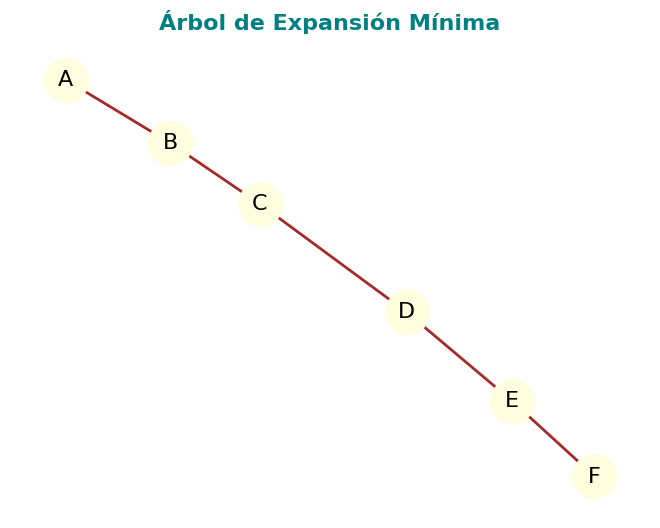

In [36]:
arbol=nx.minimum_spanning_tree(G, weight='weight')
tabla = []# Creamos una tabla con las aristas del árbol
total=0
for u, v, datos in arbol.edges(data=True):
    total+=datos['weight']
    tabla.append([u, v, datos['weight']])
from tabulate import tabulate
print("\nAristas del Árbol de Expansión Mínima:")
print(tabulate(tabla, headers=["Desde", "Hacia", "Peso"], tablefmt="grid"))
print("\nTotal de la ruta: ",total)
# Graficamos
pos=nx.spring_layout(arbol)#Distribución de nodos
nx.draw(arbol, pos, with_labels=True, node_color='lightyellow', edge_color='brown',node_size=1000, font_size=16, width=2)
plt.title("Árbol de Expansión Mínima", fontsize=16, color='teal', fontweight='bold')
plt.show()




---

##Ruta más corta


 Método con el objetivo de encontrar rutas cortas o de menor costo, según sea el caso, que va desde un nodo especifico hasta cada uno de los demás nodos de la red.

Ruta más corta de A a F:  ['A', 'C', 'F']
Longitud total:  15


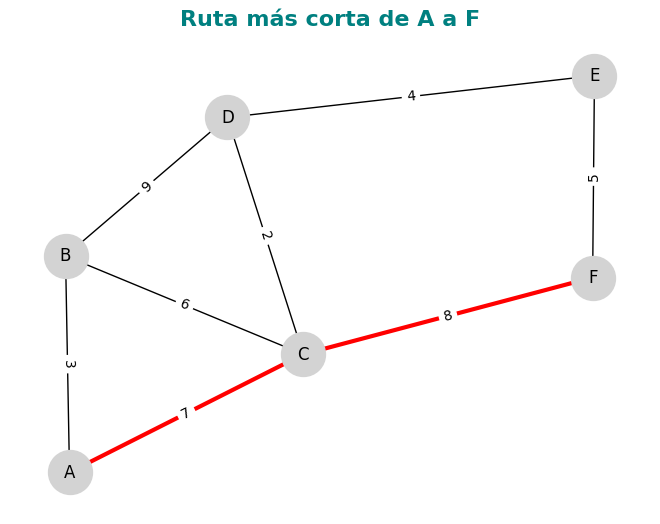

In [37]:
camino=nx.shortest_path(G,source="A",target="F",weight='weight')
l=nx.shortest_path_length(G,source="A",target="F",weight='weight')
print("Ruta más corta de A a F: ",camino)
print("Longitud total: ",l)
#Graficamos
path_edges=[]
for i in range(len(camino)-1):
    inicio=camino[i]
    fin=camino[i+1]
    path_edges.append((inicio,fin))
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,node_color='lightgrey',node_size=1000)
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='red',width=3)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.title("Ruta más corta de A a F", fontsize=16,color='teal',fontweight='bold')
plt.show()




---


##Grafo dirigido (con capacidades)
A continuación se crea un grafo con nodos A, B, C, D y capacidades entre ellos:

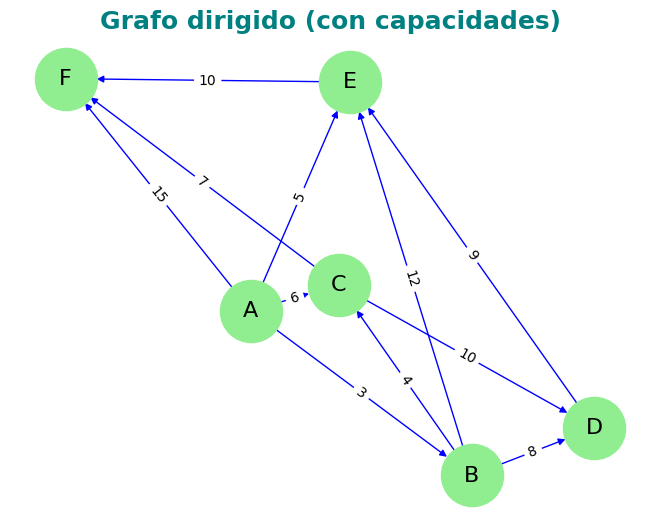

In [43]:
G=nx.DiGraph() #Grafico dirigido
G.add_edge("A","B", capacity=3)#Crea una arista dirigida del nodo A al B, con capacidad 2
G.add_edge("B","C", capacity=4)
G.add_edge("A","C",capacity=6)
G.add_edge("B","D",capacity=8)
G.add_edge("C","D",capacity=10)
G.add_edge("A","F",capacity=15)
G.add_edge("A","E",capacity=5)
G.add_edge("B","E",capacity=12)
G.add_edge("C","F",capacity=7)
G.add_edge("E","F",capacity=10)
G.add_edge("D","E",capacity=9)
#Graficamos
pos = nx.spring_layout(G) #Nos ayuda a distribuir/posicionar los nodos
capacities=nx.get_edge_attributes(G,'capacity')#Extraemos las capacidades para las aristas
nx.draw(G, pos, with_labels=True, node_color='lightgreen',edge_color='blue', node_size=2000, font_size=16, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=capacities)
plt.title("Grafo dirigido (con capacidades)", color='teal',fontsize=18, fontweight='bold')
plt.show()



---
##Flujo máximo


Utilizando este tipo de rutas dirigidas podemos calcular el flujo máximo desde un nodo fuente hasta un nodo destino, utilizando las capacidades de las aristas.


In [47]:
from tabulate import tabulate #Importamos para realizar la tabla
flujo_max, flujo_por_arista = nx.maximum_flow(G, "A", "F", capacity="capacity")#Calcular flujo máximo desde A a F
print("Flujo máximo desde A hasta F:", flujo_max)
tabla=[]
for u, dic in flujo_por_arista.items():
    for v, f in dic.items():
        tabla.append([u, v, f, G[u][v]['capacity']])
print("\nDetalle del flujo:")
print(tabulate(tabla, headers=["Desde", "Hacia", "Flujo", "Capacidad"], tablefmt="grid"))


Flujo máximo desde A hasta F: 29

Detalle del flujo:
+---------+---------+---------+-------------+
| Desde   | Hacia   |   Flujo |   Capacidad |
+=========+=========+=========+=============+
| A       | B       |       3 |           3 |
+---------+---------+---------+-------------+
| A       | C       |       6 |           6 |
+---------+---------+---------+-------------+
| A       | F       |      15 |          15 |
+---------+---------+---------+-------------+
| A       | E       |       5 |           5 |
+---------+---------+---------+-------------+
| B       | C       |       1 |           4 |
+---------+---------+---------+-------------+
| B       | D       |       0 |           8 |
+---------+---------+---------+-------------+
| B       | E       |       2 |          12 |
+---------+---------+---------+-------------+
| C       | D       |       0 |          10 |
+---------+---------+---------+-------------+
| C       | F       |       7 |           7 |
+---------+---------+------